In [3]:
library(Seurat)
library(tidyverse)
library(argparse)
library(ggplot2)
library(stringr)
library(dplyr)

In [ ]:

parser <- ArgumentParser()
parser$add_argument("--rds", help="scRNA rds path", required=TRUE)
parser$add_argument("--VDJ", help='VDJ match_contigs.csv path', required=TRUE)
parser$add_argument("--outdir", help='out dir', required=TRUE)
args <- parser$parse_args()

samplename = tail(strsplit(args$rds,split="/")[[1]],1)
samplename = str_replace(samplename, '.rds', '')

rna <- readRDS(args$rds)
vdj <- read.table(args$VDJ, sep=',', header=T)

cells <- subset(vdj, productive=='True')
barcodes <- unique(cells$barcode)

df <- rna@meta.data
df$barcode <- rownames(df)

filter_df <- filter(df, barcode %in% barcodes)
res <- table(filter_df$RNA_snn_res.0.6)
res <- as.data.frame(res)

out_csv = stringr::str_glue("{args$outdir}/{samplename}_match_barcodes_celltypes_distribution.txt")
write_csv(res,file=out_csv)

meta = rna@meta.data
meta$vir = 'NA'
meta[barcodes,'vir'] = 'BCR'
rna@meta.data = meta
rna <- RunUMAP(rna, dims = 1:20)

outP = stringr::str_glue("{args$outdir}/{samplename}_cluster_umap.png")
png(outP, height=1000, width=1000)
UMAPPlot(rna,label=TRUE)
dev.off()

outP1 = stringr::str_glue("{args$outdir}/{samplename}_umapplot.png")
png(outP1, height=1000, width=1000)
Idents(rna) <- "vir"
UMAPPlot(rna,cols=c('grey','red'),label=TRUE)
dev.off()

In [ ]:
rna <- readRDS('/SGRNJ03/randd/RD20040201_SCOPEv2_TCR/20211029/H_1020PV2_2_15min_NL/06.analysis/H_1020PV2_2_15min_NL.rds')
df = rna@meta.data
df

In [ ]:
rna <- RunUMAP(rna, dims = 1:20)

In [ ]:
ident_tsv = '/SGRNJ03/randd/RD20040201_SCOPEv2_TCR/20211029/H_1020PV2_2_15min_NL/06.analysis/H_1020PV2_2_15min_NL_auto_assign/H_1020PV2_2_15min_NL_auto_cluster_type.tsv'
cell_ident_file <- read.table(ident_tsv,header = TRUE,sep="\t",stringsAsFactors=FALSE)

In [ ]:
(cell_ident_file)

In [ ]:
current_ident <- cell_ident_file[,1]
new_ident <- cell_ident_file[,2]

In [ ]:
cell_ident_file[!duplicated(cell_ident_file$cluster),]

In [ ]:
new_ident

In [ ]:
duplicated(current_ident)

In [ ]:
stop ("duplicated cluster names")

In [4]:
rna <- readRDS('/SGRNJ03/randd/RD20040201_SCOPEv2_TCR/20211029/H_1020PV2_1_5min_NL/06.analysis/H_1020PV2_1_5min_NL.rds')
vdj <- read.table('/SGRNJ03/randd/RD20073101_SCOPEv2_TCR/20211104_2/H_1020PV2_1_5min_2NL150/03.assemble/match/match_contigs.csv', sep=',', header=T)

cells <- subset(vdj, productive=='True')
barcodes <- unique(cells$barcode)

df <- rna@meta.data
df$barcode <- rownames(df)

filter_df <- filter(df, barcode %in% barcodes)
res <- table(filter_df$seurat_clusters)
res <- as.data.frame(res)

In [ ]:
res

In [ ]:
meta = rna@meta.data
meta$vir = 'NA'
meta[barcodes,'vir'] = 'BCR'
rna@meta.data = meta
rna <- RunUMAP(rna, dims = 1:20)

In [5]:
meta = rna@meta.data
meta$Class = 'NA'
meta[barcodes,'Class'] = 'T/BCR'
rna@meta.data = meta
rna <- RunUMAP(rna, dims = 1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:34:32 UMAP embedding parameters a = 0.9922 b = 1.112

14:34:32 Read 17150 rows and found 20 numeric columns

14:34:32 Using Annoy for neighbor search, n_neighbors = 30

14:34:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:34:34 Writing NN index file to temp file /tmp/Rtmp5XseRa/filedb75154d4d43

14:34:34 Searching Annoy index using 1 thread, search_k = 3000

14:34:41 Annoy recall = 100%

14:34:42 Commencing smooth kNN distance calibration using 1 thread

14:34:43 Initializing fr

In [ ]:
UMAPPlot(rna,group.by='seurat_clusters',label=TRUE)

In [ ]:
UMAPPlot(rna,group.by='BCR',cols=c('red','grey'),label=TRUE)

In [10]:
rna@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,RNA_snn_res.0.6,seurat_clusters,Class
,<fct>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<chr>
AAACATCGAAACATCGCCATCCTC,H_1020PV2_1_5min_NL,325,254,0.06769231,6,7,NA
AAACATCGAAACATCGGAATCTGA,H_1020PV2_1_5min_NL,309,239,0.07766990,0,1,NA
AAACATCGAAACATCGGACAGTGC,H_1020PV2_1_5min_NL,242,175,0.06198347,1,2,NA
AAACATCGAACAACCACTGTAGCC,H_1020PV2_1_5min_NL,522,339,0.07088123,3,4,NA
AAACATCGAACAACCATTCACGCA,H_1020PV2_1_5min_NL,387,265,0.10335917,0,1,T/BCR
AAACATCGAACCGAGAATTGGCTC,H_1020PV2_1_5min_NL,1375,759,0.10254545,8,9,NA
AAACATCGAACCGAGAGAACAGGC,H_1020PV2_1_5min_NL,687,423,0.09606987,2,3,NA
AAACATCGAACCGAGAGAGCTGAA,H_1020PV2_1_5min_NL,468,292,0.12606838,5,6,T/BCR
AAACATCGAACGCTTACCTCTATC,H_1020PV2_1_5min_NL,402,274,0.08706468,0,1,NA


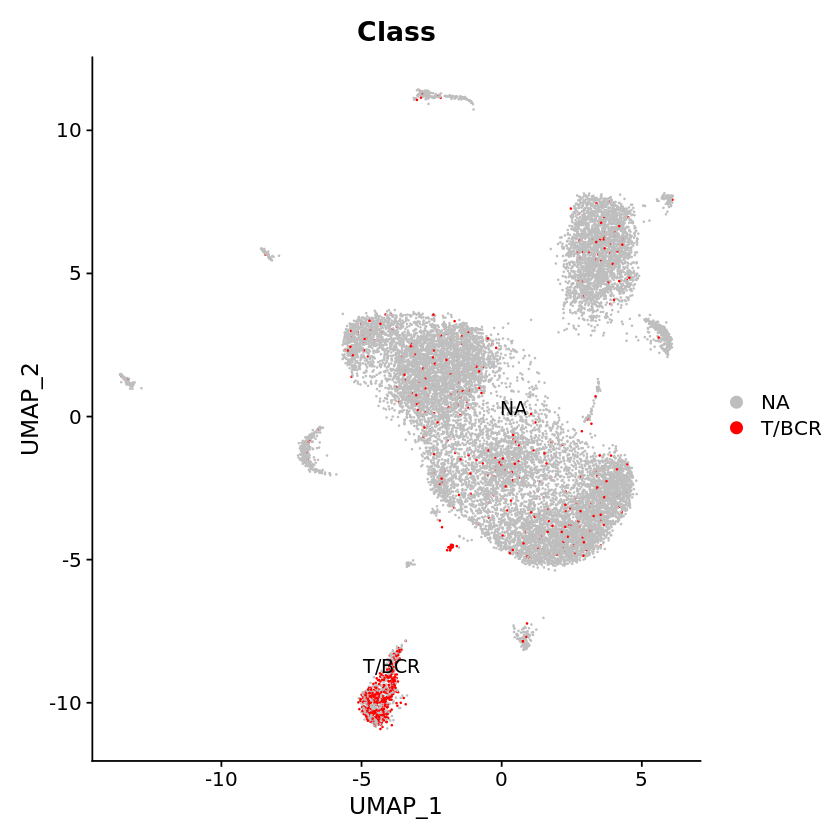

In [13]:

UMAPPlot(rna,group.by='Class',cols=c('grey','red'),label=TRUE)

In [ ]:
ident_tsv = '/SGRNJ03/randd/RD20040201_SCOPEv2_TCR/20211029/H_1020PV2_1_5min_NL/06.analysis/H_1020PV2_1_5min_NL_auto_assign/H_1020PV2_1_5min_NL_auto_cluster_type.tsv'
cell_ident_file <- read.table(ident_tsv,header = TRUE,sep="\t",stringsAsFactors=FALSE)

In [ ]:
library(dplyr)
cell_ident_file <- cell_ident_file %>%
  group_by(cluster) %>%
  filter(avg_pct.diff==max(avg_pct.diff))

In [ ]:
cell_ident_file

In [ ]:
current_ident <- cell_ident_file[,1]
new_ident <- cell_ident_file[,2]

In [ ]:
current_ident

In [ ]:
new_ident

In [ ]:
new.cluster.ids = (new_ident$cell_type)

In [ ]:
new.cluster.ids

In [ ]:
Idents(rna) <- "seurat_clusters"
names(new.cluster.ids) <- sort(as.numeric(levels(rna)))
rna <- RenameIdents(rna, new.cluster.ids)
rna <- StashIdent(object = rna, save.name = "ClusterNames")

In [ ]:
rna@meta.data

In [ ]:
UMAPPlot(rna,group.by='ClusterNames',label=TRUE,label.box=TRUE,title = NULL)

In [ ]:
Idents(rna) <- "seurat_clusters"

In [ ]:
sort(as.numeric(levels(rna)))

In [ ]:
Idents(rna) <- "seurat_clusters"

In [ ]:
rna@active.ident <- plyr::mapvalues(x = rna@active.ident, from = current_ident, to = new_ident)
rna[["new_ident"]] <- Idents(object = rna)

In [ ]:
levels(rna@active.ident)

In [ ]:
current_ident

In [ ]:
rna@active.ident

In [ ]:
duplicated(current_ident)

In [ ]:
stop ("duplicated cluster names")